###APPLE DISEASE DETECTION MODEL



In [ ]:
import zipfile
import os

# Unzip the dataset
zip_path = "/content/archive (1).zip"
extract_path = "/content/apple-disease-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped successfully!")


✅ Dataset unzipped successfully!


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    '/content/apple-disease-dataset/datasets/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_data = test_datagen.flow_from_directory(
    '/content/apple-disease-dataset/datasets/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes for 4 leaf conditions
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    epochs=20,  # You can adjust epochs if needed
    validation_data=test_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 59s 220ms/step - accuracy: 0.5996 - loss: 0.9243 - val_accuracy: 0.7504 - val_loss: 0.7319
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 48s 196ms/step - accuracy: 0.8338 - loss: 0.4336 - val_accuracy: 0.8523 - val_loss: 0.4608
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 47s 194ms/step - accuracy: 0.8897 - loss: 0.2837 - val_accuracy: 0.9089 - val_loss: 0.2570
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 47s 194ms/step - accuracy: 0.9198 - loss: 0.2319 - val_accuracy: 0.8904 - val_loss: 0.3346
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 48s 195ms/step - accuracy: 0.9419 - loss: 0.1604 - val_accuracy: 0.9475 - val_loss: 0.1400
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 50s 206ms/step - accuracy: 0.9470 - loss: 0.1454 - val_accuracy: 0.9691 - val_loss: 0.1050
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 47s 195ms/step - accuracy: 0.9592 - loss: 0.1137 - val_accuracy: 0.9774 - val_loss: 0.0721
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 48s 196ms/step - accuracy: 0.9588 - loss: 0

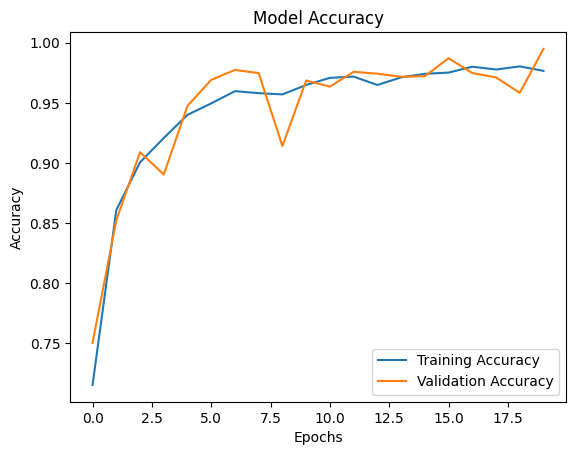

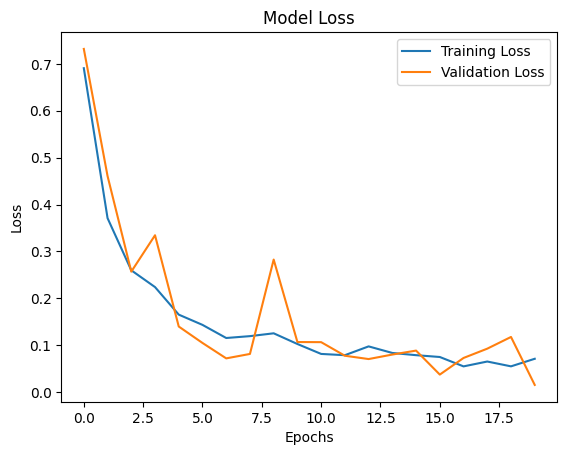

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9968 - loss: 0.0121
✅ Test Accuracy: 99.49%


In [ ]:
model.save('apple_leaf_disease_model.h5')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('apple_leaf_disease_model.h5')

# Load and preprocess the image
img_path = '/content/apple-disease-dataset/datasets/test/cedar_apple_rust/0fbdccdc-fb96-475a-92bb-65734592c895___FREC_C.Rust 3619_180deg.JPG'  # Change this path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())
print(f"🍎 Predicted Class: {class_labels[class_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
🍎 Predicted Class: cedar_apple_rust


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('apple_leaf_disease_model.h5')

# Load and preprocess the image
img_path = '/18.JPG'  # Change this path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())
print(f"🍎 Predicted Class: {class_labels[class_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
🍎 Predicted Class: healthy


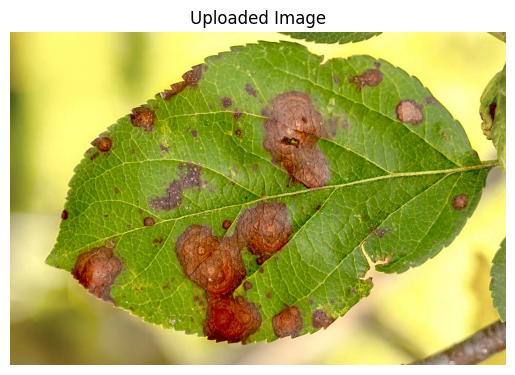

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

    Apple Leaf Health Report
    ------------------------
    Prediction: Cedar Apple Rust
    Confidence: 98.27%

    Details: Cedar apple rust is caused by Gymnosporangium juniperi-virginianae, producing bright orange or rust-colored spots, often with spore masses underneath leaves.
    
    How to Cure It:
    
- Apply fungicides such as Mancozeb or Propiconazole before symptoms appear.
- Remove nearby cedar trees to reduce fungal spread.

How to Care Now:
- Prune infected branches immediately.
- Monitor weather conditions—disease spreads faster in humid environments.

How to Prevent Future Outbreaks:
- Plant resistant apple tree varieties.
- Improve airflow between trees by pruning and spacing them appropriately.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Enhanced disease information and recommendations
disease_info = {
    "apple_scab": {
        "Description": "Apple scab is caused by the fungus Venturia inaequalis, which results in dark, scaly lesions on leaves and fruit. It spreads rapidly in cool, wet conditions.",
        "Cure": [
            "Apply fungicides such as Myclobutanil or Captan during early spring.",
            "Prune infected leaves and branches to reduce fungal spread."
        ],
        "Care_Now": [
            "Rake and remove all fallen leaves and fruit to minimize fungal spores.",
            "Ensure proper watering—avoid overhead irrigation to keep leaves dry."
        ],
        "Prevention": [
            "Plant disease-resistant apple varieties.",
            "Apply dormant oil spray before buds open to kill overwintering spores."
        ]
    },
    "cedar_apple_rust": {
        "Description": "Cedar apple rust is caused by Gymnosporangium juniperi-virginianae, producing bright orange or rust-colored spots, often with spore masses underneath leaves.",
        "Cure": [
            "Apply fungicides such as Mancozeb or Propiconazole before symptoms appear.",
            "Remove nearby cedar trees to reduce fungal spread."
        ],
        "Care_Now": [
            "Prune infected branches immediately.",
            "Monitor weather conditions—disease spreads faster in humid environments."
        ],
        "Prevention": [
            "Plant resistant apple tree varieties.",
            "Improve airflow between trees by pruning and spacing them appropriately."
        ]
    },
    "black_rot": {
        "Description": "Black rot is caused by Botryosphaeria obtusa, characterized by dark, circular lesions with a purple border that enlarge over time.",
        "Cure": [
            "Remove and destroy infected leaves, twigs, and fruit.",
            "Apply fungicides like Captan, Thiophanate-methyl, or Myclobutanil."
        ],
        "Care_Now": [
            "Clean pruning tools to avoid spreading the fungus.",
            "Increase soil drainage to prevent moisture buildup."
        ],
        "Prevention": [
            "Regularly inspect and prune weak branches.",
            "Avoid planting apple trees near junipers, which may harbor fungal spores."
        ]
    },
    "healthy": {
        "Description": "The leaf appears healthy with no signs of disease.",
        "Cure": ["No immediate action required."],
        "Care_Now": [
            "Ensure the plant receives proper nutrients and water.",
            "Inspect leaves regularly for early signs of disease."
        ],
        "Prevention": [
            "Mulch around the tree base to retain moisture and suppress weeds.",
            "Ensure good airflow by pruning crowded branches."
        ]
    }
}

# Function to generate the report
def generate_report(predicted_class, confidence):
    report = f"""
    Apple Leaf Health Report
    ------------------------
    Prediction: {predicted_class.replace('_', ' ').title()}
    Confidence: {confidence:.2f}%

    Details: {disease_info[predicted_class]["Description"]}

    How to Cure It:
    """
    for cure in disease_info[predicted_class]["Cure"]:
        report += f"\n- {cure}"

    report += "\n\nHow to Care Now:"
    for care in disease_info[predicted_class]["Care_Now"]:
        report += f"\n- {care}"

    report += "\n\nHow to Prevent Future Outbreaks:"
    for prevention in disease_info[predicted_class]["Prevention"]:
        report += f"\n- {prevention}"

    print(report)

# Load and preprocess the image
img_path = "/10.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Predict using your trained model
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[class_index]
confidence = prediction[0][class_index] * 100

# Generate Report
generate_report(predicted_class, confidence)
